In [1]:
import numpy as np 
import pandas as pd
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataset_folder_name = './/Screen_Capturing/Data'
TRAIN_TEST_SPLIT = 0.8
IM_WIDTH = 198
IM_HEIGHT = 198
IMAGE_SAMPLE_SIZE = 7800

Retrieve Data

In [13]:
replace_dict = {"'mouse'":'"mouse"',"'click'":'"click"',"'keyboard'":'"keyboard"',"['":'["',"', '":'", "', "']":'"]'}

def clean_input(input):
    for key, value in replace_dict.items():
        input = input.replace(key, value)
    return input

def parse_dataset():
    with open(os.path.join(dataset_folder_name,'data.txt'), 'r', encoding="utf-8") as file:
        files_data = file.read().split("\n")
        
    records = []
    for file_data in files_data[: min(IMAGE_SAMPLE_SIZE, len(files_data)-1)]:
        file_name, inputs = file_data.split("\t")
        inputs = clean_input(inputs)
        print(inputs)
        inputs = json.loads(inputs)
        file_name = file_name + ""
        data = inputs["mouse"][0], inputs["mouse"][1], inputs["click"][0], inputs["keyboard"], file_name
        records.append(data)

    return records

In [11]:
def pd_dataset(dataset):
    df = pd.DataFrame(dataset)
    df.columns = ['x', 'y', 'click', 'keyboard', 'file']

    return df

In [18]:
dataset = parse_dataset()
df = pd_dataset(dataset)
df.head(100)

{"mouse": [1004, 804], "click": ["", ""], "keyboard": []}
{"mouse": [1054, 914], "click": ["", ""], "keyboard": []}
{"mouse": [1109, 976], "click": ["", ""], "keyboard": []}
{"mouse": [1156, 1025], "click": ["", ""], "keyboard": []}
{"mouse": [1158, 1028], "click": ["", ""], "keyboard": []}
{"mouse": [1168, 1040], "click": ["", ""], "keyboard": []}
{"mouse": [1180, 1053], "click": ["", ""], "keyboard": []}
{"mouse": [1190, 1055], "click": ["", ""], "keyboard": []}
{"mouse": [1194, 1056], "click": ["", ""], "keyboard": []}
{"mouse": [1195, 1059], "click": ["", ""], "keyboard": []}
{"mouse": [1195, 1060], "click": ["", ""], "keyboard": []}
{"mouse": [1193, 1060], "click": ["Button.left", "1"], "keyboard": []}
{"mouse": [1193, 1060], "click": ["", "0"], "keyboard": []}
{"mouse": [1193, 1060], "click": ["", "0"], "keyboard": []}
{"mouse": [1193, 1060], "click": ["", "0"], "keyboard": []}
{"mouse": [1193, 1060], "click": ["", "0"], "keyboard": []}
{"mouse": [1142, 929], "click": ["", "0"], 

,x,y,click,keyboard,file
0,1004,804,,[],1eda3fd6-9c09-6433-ab8c-b7d869c36612
1,1054,914,,[],1eda3fd6-9e7f-6a5b-873b-758d34776359
2,1109,976,,[],1eda3fd6-9f6c-6799-9c58-d765ddebd617
3,1156,1025,,[],1eda3fd6-a06a-6fef-b014-4d12b46e1342
4,1158,1028,,[],1eda3fd6-a14c-6687-bf85-0d8085758d4c
...,...,...,...,...,...
95,1027,587,,[d],1eda3fd6-ec84-6932-9764-027f554a713a
96,1027,587,,[],1eda3fd6-ed73-6afe-bfe3-ddd7cc5376de
97,1027,587,,[k],1eda3fd6-ee51-61f9-8b92-820b5b04089f
98,1027,587,,[],1eda3fd6-ef41-65f4-b8b1-46a8220dfecf


Display Data

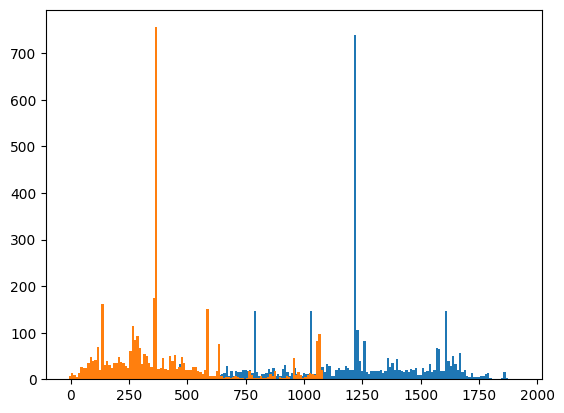

In [25]:
binwidth = 10

x_values = df['x'].values.tolist()
y_values = df['y'].values.tolist()

plt.hist(df['x'],bins=range(min(df['x']), 1920 + binwidth, binwidth))
plt.hist(df['y'],bins=range(min(df['y']), 1080 + binwidth, binwidth))
plt.show()

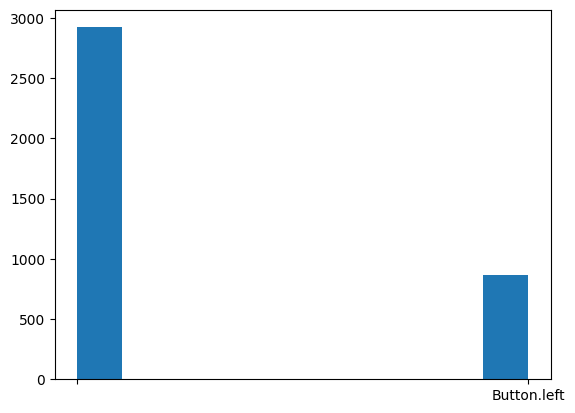

In [26]:
plt.hist(df['click'])
plt.show()

In [27]:
from scipy.ndimage import gaussian_filter
import matplotlib.cm as cm

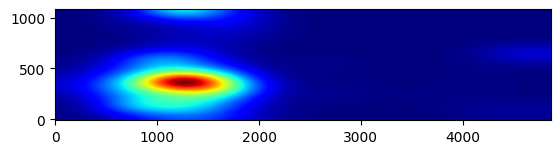

In [31]:
def myplot(s,bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x_values, y_values, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


s = 64
img, extent = myplot(s)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

In [33]:
df['keyboard'].value_counts()[:10]

[]             3319
[space]          63
[e]              44
[ctrl_l]         35
[t]              33
[s]              28
[backspace]      26
[i]              22
[a]              21
[n]              17
Name: keyboard, dtype: int64

Editing Data to # of occurrence

In [34]:
def add_key(key, dict):
    key = str(key)
    key = key.replace("'", '"')
    key = json.loads(key)
    if not key:
        if '' not in dict:
            dict[''] = 1
        else:
            dict[''] += 1
    for i in range(len(key)):
        if key[i] not in dict:
            dict[key[i]] = 1
        else:
            dict[key[i]] += 1
    return dict

In [35]:
keyboard_data = {}

for i in df['keyboard']:
    keyboard_data = add_key(i, keyboard_data)

keyboard_data = {k: v for k, v in sorted(keyboard_data.items(), key=lambda item: item[1], reverse=True)}

keyboard_data

{'': 3322,
 'space': 65,
 'e': 45,
 'ctrl_l': 35,
 't': 33,
 's': 31,
 'backspace': 26,
 'a': 25,
 'i': 24,
 'n': 20,
 'r': 19,
 'o': 16,
 'p': 14,
 'm': 13,
 'd': 11,
 'shift': 10,
 'h': 10,
 'c': 9,
 'y': 9,
 'l': 9,
 'u': 7,
 'w': 6,
 'g': 6,
 'k': 5,
 'enter': 5,
 '.': 5,
 'b': 5,
 'v': 4,
 'q': 4,
 'x': 2,
 ',': 2,
 '0': 2,
 'f': 2,
 'R': 1,
 'T': 1,
 'z': 1,
 'down': 1,
 'L': 1,
 '1': 1,
 '5': 1}

Display # of occurances of keys

<BarContainer object of 15 artists>

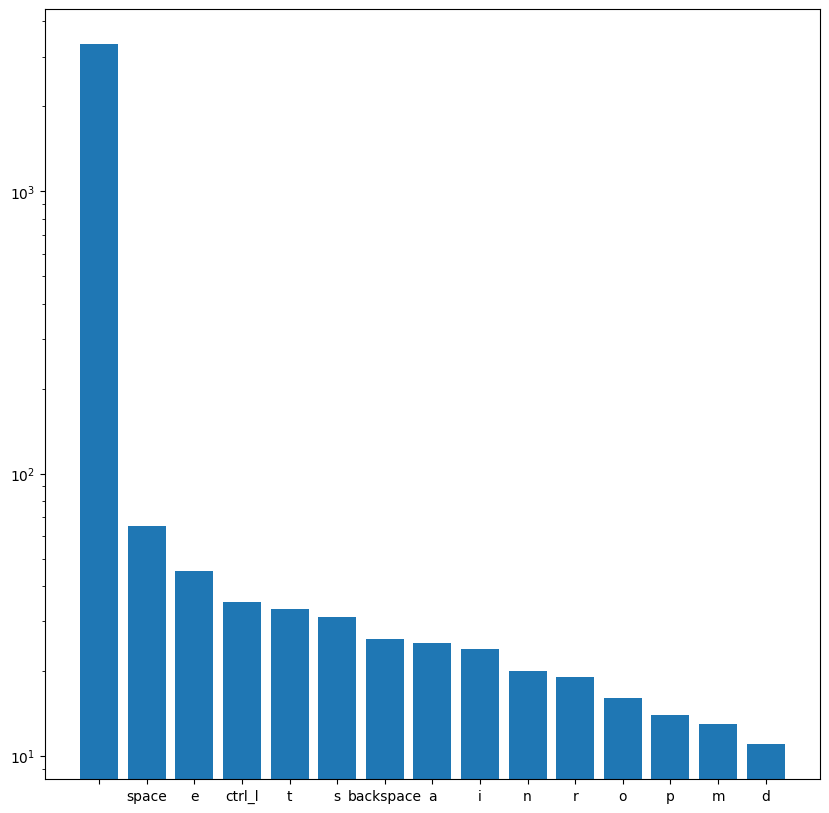

In [46]:
keys = list(keyboard_data.keys())
values = list(keyboard_data.values())

plt.rcParams['figure.figsize'] = [10, 10]
plt.bar(keys[:15], values[:15], log=1)

Truncate Data to the top 10 most occured keys

In [47]:
import itertools
dataset_dict = {}
dataset = {}
for i in range(len(keyboard_data)):
    dataset[i] = keys[i]

dataset_dict["keyboard"] = dict(itertools.islice(dataset.items(), 0, 10))

dataset_dict

{'keyboard': {0: '',
  1: 'space',
  2: 'e',
  3: 'ctrl_l',
  4: 't',
  5: 's',
  6: 'backspace',
  7: 'a',
  8: 'i',
  9: 'n'}}

Clicks dict

In [48]:
def add_click(click, dict):
    click = str(click)
    click = click.replace("'", '"')
    if not click:
        if '' not in dict:
            dict[''] = 1
        else:
            dict[''] += 1
    elif click not in dict:
        dict[click] = 1
    else:
        dict[click] += 1
    return dict

In [49]:
click_data = {}

for i in df['click']:
    click_data = add_click(i, click_data)

click_data = {k: v for k, v in sorted(click_data.items(), key=lambda item: item[1], reverse=True)}

dataset_dict["click"] = click_data
dataset_dict

{'keyboard': {0: '',
  1: 'space',
  2: 'e',
  3: 'ctrl_l',
  4: 't',
  5: 's',
  6: 'backspace',
  7: 'a',
  8: 'i',
  9: 'n'},
 'click': {'': 2922, 'Button.left': 868}}